# Proyecto Integrado.

## Introducción.

Este proyecto tiene como objetivo la aplicación de las siguientes habilidades:

- Herramientas de programación en Python.
- Preprocesamiento de datos.
- Análisis exploratorio de datos.
- Análisis estadístico. 

Para ello, se realiza el ejercicio al considerar datos históricos sobre las ventas de videojuegos de la tienda online "Ice" del año 2016. La tarea consiste en identificar patrones que determinen si un juego tiene éxito o no, de manera que, a futuro se puedan detectar proyectos prometedores y planificar campañas publicitarias.

## Metodología.

Para el desarrollo de este proyecto se deben seguir una serie de pasos que nos permitirán alcanzar el objetivo del proyecto.

- **Preparación de los datos:** En esta sección se toman los datos en "limpio" (sin modificaciones), se hace un análisis preliminar para conocer los datos y a partir de ahí, se toma la decisión de las modificaciones más convenientes que eliminen posibles errores y faciliten los siguientes pasos.

- **Análsis exploratorio:** En esta sección se busca obtener información importante a partir de los datos procesados adecuadamente. Se localizan los elementos que más resaltan de otros, se construyen gráficos que nos permitan explicar con detalle el comportamiento de las ventas y si se tiene una relación con otros factores.

- **Análisis estadístico:** En esta sección se busca probar las hipótesis que se tienen sobre el comportamiento de los usuarios, para ello se desarrolla una hipótesis nula y una alternativa para cada caso de nuestro interés. 

## Preparación de los datos

Como primer acercamiento debemos conocer el dataset de interés para tomar las medidas más convenientes que nos permitan hacer los arreglos necesarios(preprocesamiento de datos) de forma que los elementos e información del dataset sea la más adecuada para hacer el análisis exploratorio sin mayor problema. 

Para lograr esto debemos seguir los siguientes pasos:
1. Comprensión general del dataset.
2. Tratamiento de valores ausentes.
3. Conversión de datos.
4. Valores duplicados.

Para poder empezar a trabajar importamos las librerias necesarias y leemos el archivo de datos para construir el dataframe mediante Pandas.

In [1]:
#Se importan las librerias necesarias.
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
#Se cargan los datos de interés. 

games = pd.read_csv('games.csv')

### Comprensión general del dataset.

Para esta tarea nos ayudaremos de los métodos <code>info()</code> y <code>sample()</code>:

In [3]:
#Mostramos la información general del dataframe
games.info()
#Mostramos una muestra aleatoria del dataframe
games.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
8223,Street Fighter: The Movie,PS,1995.0,Fighting,0.10,0.07,0.00,0.01,NaN,NaN,NaN
8622,J-League Jikkyou Winning Eleven 2000,PS,2000.0,Sports,0.00,0.00,0.15,0.01,NaN,NaN,NaN
9105,Chicken Shoot,DS,2007.0,Action,0.13,0.00,0.00,0.01,19.0,3.1,E10+
10869,Populous: The Beginning,PS,1998.0,Strategy,0.05,0.04,0.00,0.01,NaN,NaN,NaN
5058,Wii Sports Club,WiiU,2014.0,Sports,0.17,0.14,0.04,0.03,68.0,7,E10+


Con la información general observamos que se tienen 16,715 entradas totales y 10 columnas que nos entregan diferente información:

- **Name:** 
    - Descripción: Nombre del videojuego.
    - Tipo de dato: 'object'. Al ser nombres deben almacenarse en strings.
    - Valores ausentes: Solo se presentan 2 valores ausentes. 
- **Platform:**
    - Descripción: Plataforma a la que pertenece el videojuego(pueden existir juegos multiplataforma).
    - Tipo de dato: 'object'. Al ser nombres deben almacenarse en strings.
    - Valores ausentes: No se presentan valores ausentes.
- **Year_of_Release:**
    - Descripción: Año de lanzamiento.
    - Tipo de dato: 'float'. Los años son valores que no tienen valores con decimales, puede ser buena opción hacer el cambio al tipo 'int'. 
    - Valores ausentes: 269 valores ausentes. 
- **Genre:** 
    - Descripción: Género.
    - Tipo de dato: 'object'. Al ser nombres deben almacenarse en strings. 
    - Valores ausentes: Solo se tienen 2 valores ausentes.
- **NA_sales:** 
    - Descripción: Ventas del videojuego en Norteamérica en millones de dólares estadounidenses.
    - Tipo de dato: 'float'. Se utilizan valores con decimales, así que float es el tipo adecuado.
    - Valores ausentes: No hay valores ausentes.
- **EU_sales:**
    - Descripción: Ventas del videojuego en Europa en millones de dólares estadounidenses.
    - Tipo de dato: 'float'. Se utilizan valores con decimales, así que float es el tipo adecuado.
    - Valores ausentes: No hay valores ausentes.
- **JP_sales:**
    - Descripción: Ventas del videojuego en Japón en millones de dólares estadounidenses.
    - Tipo de dato: 'float'. Se utilizan valores con decimales, así que float es el tipo adecuado.
    - Valores ausentes: No hay valores ausentes.
- **Other_sales:**
    - Descripción: Ventas del videojuego en otros países en millones de dólares estadounidenses.
    - Tipo de dato: 'float'. Se utilizan valores con decimales, así que float es el tipo adecuado.
    - Valores ausentes: No hay valores ausentes.
- **Critic_Score:**
    - Descripción: Calificación al videojuego otorgada por críticos, con un valor máximo de 100.
    - Tipo de dato: 'float'. No se utilizan valores con decimales, por lo que el cambio a tipo 'int' puede considerarse.
    - Valores ausentes: 8578 valores ausentes.
- **User_Score:**  
    - Descripción: Calificación otorgada por los usuarios, con un valor máximo de 10.
    - Tipo de dato: 'Object'. Se utilizan valores con decimales, por lo que float sería el tipo adecuado. Sin embargo deben tratarse los valores 'tbd'. 
    - Valores ausentes: 6701 valores ausentes.
- **Rating:** 
    - Descripción: Clasificación otorgada por la ESRB, se utilizan letras o una configuración de letra y número. Por ejemplo: E10+ que significa para edades de 10 años o más. 
    - Tipo de dato: 'object'. Al almacenarse letras, se deben usar strings.
    - Valores ausentes: 6766 valores ausentes.
    

También es importante señalar que es necesario hacer el cambio de los nombres de las columnas para mantener la convención 'snake_case', para este caso en particular, basta con convertir todas las letras en minúsculas.


In [4]:
#Cambiar el nombre de las columnas a minúsculas:
games.columns = games.columns.str.lower()

### Tratamiento de valores ausentes.

Como primer paso para tratar los valores ausentes es necesario conocer si el número de valores ausentes es significativo para los datos que nos interesan para cada columna.

In [5]:
#Calculamos y mostramos el porcentaje de valores ausentes presentes en cada columna.
print("Porcentaje de valores ausentes presentes en cada columna:\n")
print(100*games.isna().sum() / games.shape[0])

Porcentaje de valores ausentes presentes en cada columna:

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         40.089740
rating             40.478612
dtype: float64


#### Análisis y Estrategia

En esta sección se analizaran los valores ausentes que aparecen en cada columna y cuál es la mejor decisión para tratarlos.

##### Columnas Name y Genre
Como se observa en la tabla del porcentaje de valores ausentes, en las columnas "name" y "genre" se tiene el mismo valor y es muy pequeño. Por lo que probablemente se trate de las mismas filas.

In [6]:
#Mostramos las filas con valores ausentes en la columna 'name'
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Como se observa, sí son las mismas filas en la que se presentan los valores ausentes en las columnas 'name' y 'genre'. Además, también presentan valores ausentes en las columnas 'critic_score','user_score' y 'rating', junto con números de ventas bastante bajos.
De esta forma, se toma la decisión de eliminar estas dos filas con valores ausentes.


In [7]:
#Eliminamos los valores ausentes en las columnas 'name' y 'genre'.
games.dropna(subset=['name', 'genre'],inplace=True)
#Reiniciamos el índice:
games.reset_index(drop=True,inplace=True)

##### Columna year_of_release

En esta columna solo se tiene una presencia del 1.6% de valores ausentes, el cual no puede representar un riesgo para nuestro análisis pero es importante tomar las acciones necesarias para eliminar dichos valores.

En el mundo de los videojuegos está la presencia de lanzamientos "multiplataforma", es decir, un juego se lanza simultáneamente en varias plataformas disponibles en ese año. De esta forma, cabe la posibilidad que la información del año de lanzamiento esté disponible dentro del mismo dataframe pero en otra fila correspondiente a una plataforma distinta.
Como ejemplo mostramos el juego "FIFA Soccer 2004':

In [8]:
#Mostramos los datos ejemplo:
display(games[games['name'] == 'FIFA Soccer 2004'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
2605,FIFA Soccer 2004,XB,2003.0,Sports,0.24,0.49,0.00,0.05,82.0,8.2,E
12028,FIFA Soccer 2004,GC,2003.0,Sports,0.05,0.01,0.00,0.00,83.0,6.2,E
13085,FIFA Soccer 2004,GBA,2003.0,Sports,0.04,0.01,0.00,0.00,82.0,7.9,E


Este juego tiene un valor NaN en la plataforma PS2, pero sí se tiene la información del año de lanzamiento en las demás plataformas. Así que haremos la imputación de estos valores ausentes de juegos **multiplataforma** mediante la información presente en las demás plataformas donde está presentes. Hay casos donde los lanzamientos no se realizaron en el mismo año(muchas veces los lanzamientos se retrasan unos meses), así que se usará la **mediana** de los valores presentes, para el caso en el que la mediana resulte con decimales, se hará el redondeo hacia arriba.


In [9]:
#Agrupamos mediante 'name' para obtener los datos de un mismo juego en diferentes plataformas
#Calculamos la mediana y redondeamos hacia arriba para evitar valores con decimales.
#Así, obtenemos un Series cuyo índice son los nombres.
correccion_años = np.ceil(games.groupby('name')["year_of_release"].median())
#Sustituimos los valores ausentes correspondientes mediante el método fillna() y el objeto series creado
#Para ello es necesario que el Series y el DF tengan el mismo índice, por lo que fijamos la columna 'name'
#como índice y hacemos la sustitución. Posteriormente, reiniciamos el índice al original
#y asignamos en la columna de interés.
games['year_of_release'] = games.set_index("name")["year_of_release"].fillna(correccion_años).reset_index(drop=True)
#Mostramos los valores ausentes restantes.
print('Valores ausentes restantes:',games['year_of_release'].isna().sum())

Valores ausentes restantes: 146


De esta forma, logramos reducir de 269 a 146 los valores ausentes, que si bien no es un valor significativo dado el tamaño de nuestra muestra. Nos permite rescatar información que sí puede llegar a ser útil en nuestro análisis.

El resto de valores ausentes se mantendrán así ya que no se cuenta con una fuente externa que nos permita obtener dicha información y el sustituir con algún otro valor puede modificar y perjudicar nuestros resultados, mientras que un valor NaN no se verá reflejado en cálculos como el promedio.

##### Columnas critic_score y user_score.

Las últimas 3 columnas del dataframe son las que presentan mayor porcentaje de valores ausentes(critic_score 51%, user_score 40%), lo cual significa que no podemos sustituirlos por algún otro valor porque afectaría en nuestro análisis al tener casi la mitad de valores "inventados" y de igual forma, decido no eliminarlos ya que eso reduciría nuestra muestra casi a la mitad. 

No encuentro alguna relación que explique por qué se presentaron estos valores ausentes. Sin embargo, una estrategia para disminuir la presencia de dichos valores es buscar fuentes externas confiables. 

##### Columna rating

En esta columna se tiene un 40% de valores ausentes, el cual es un valor bastante alto. Sin embargo, no veo problema en sustituir los valores 'NaN' por la leyenda 'Unavailable', lo cual dará más información al lector sobre la disponibilidad del rating del juego en cuestión y abarca tanto para juegos que aún no tienen clasificación como para la información que no tenemos disponible por el momento.

In [10]:
#Sustituimos los valore ausentes en la columna rating
games['rating'] = games['rating'].fillna('Unavailable')

### Conversión de datos

Con la información obtenida en la sección 3.1 conocemos los tipos de dato que se tienen en cada columna, en esta sección consideraremos las posibles conversiones a realizar.

- **year_of_release**: Los años se muestran como números enteros(sin decimales) por lo que la conversión a tipo 'int' sería lo más adecuado. La única limitante son los valores ausentes que aún están presentes en esta columna pero se mantienen para no modificar el análisis posterior de estos datos. Por lo que se mantendrá el tipo "float" pero se abre la posibilidad de hacer el cambio si no se tuvieran valores ausentes.
- **critic_score**: Las calificaciones almacenadas en esta columna van del 0 al 100 y no presenta parte decimal, por lo que la conversión a tipo "int" también sería conveniente, pero se tiene el mismo problema que la columna "year_of_release", la presencia de valores ausentes nos impide hacer esta conversión. Por lo que se mantendrá el tipo "float" pero se abre la posibilidad de hacer el cambio si no se tuvieran valores ausentes.
- **user_score**: Las calificaciones almacenadas en esta columna van del 0 al 10 y sí presentan parte decimal, por lo que el cambio al tipo "float" es el más adecuado. Para poder realizar este cambio primero deben tratarse los valores 'tbd', los cuales no son de nuestro interés en este momento. Así que se toma la decisión de sustituir los valores 'tbd' por valores NaN, así ya podemos realizar el cambio a tipo 'float' para toda la columna.


In [11]:
#Se hacen las conversiones de datos necesarias:
games['user_score'] = games['user_score'].replace('tbd',np.nan)
games['user_score'] = games['user_score'].astype(float)

### Valores duplicados

Por último, realizamos una pequeña búsqueda en caso de que existan valores duplicados en el dataset.

In [12]:
#Buscamos valores duplicados en el DF
print("Número de valores duplicados:\n",games[games.duplicated()].count())

Número de valores duplicados:
 name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64


### Ventas totales

Como último paso antes de seguir al análisis exploratorio de los datos, se nos pide que calculemos las ventas totales para cada juego.

In [13]:
#Calculamos el total de ventas para cada videiojuego.
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
#Modificamos el orden de las columnas 
games = games[['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'total_sales', 'critic_score', 'user_score', 'rating']]
#Mostramos los cambios realizados
display(games.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,40.24,NaN,NaN,Unavailable
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,31.38,NaN,NaN,Unavailable


## Análisis exploratorio de datos

Ahora que tenemos los datos listos, pasaremos al análisis. 

### Juegos por año

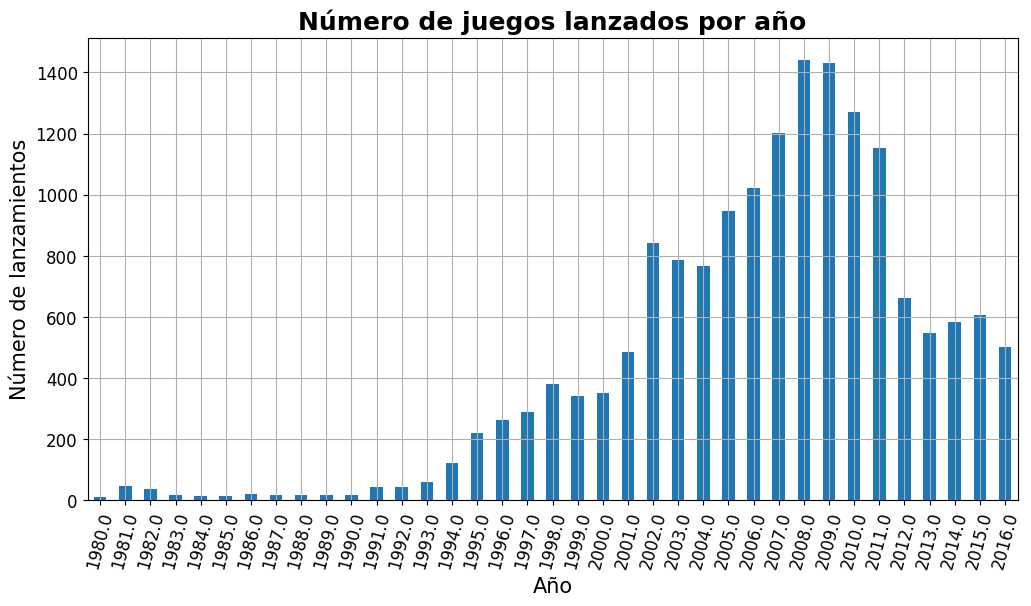

In [14]:
#Agrupamos por año y contamos en la columna 'name'
games_per_year = games.groupby('year_of_release')['name'].count()
#Creamos un gráfico:

games_per_year.plot(x='year_of_release',
                    y='name',
                    kind = 'bar',
                    grid = True,
                    figsize = [12,6],
                    fontsize = 12,rot=75)
plt.title('Número de juegos lanzados por año', fontsize=18,fontweight=600)
plt.xlabel('Año', fontsize=15)
plt.ylabel('Número de lanzamientos', fontsize=15)
plt.show()

Como podemos observar, antes del año 1990 los lanzamientos no pasaban de 50 títulos por año. Con el avance de la tecnología y el aumento en la popularidad de los videojuegos, el número de lanzamientos fue aumentando. 

De 1990 al 2000, el número de lanzamientos no pasó de 500 por año, pero a partir del año 2002 en adelante, los lanzamientos no disminuyeron de 500 por año. 

Un factor importante a destacar son las plataformas disponibles, antes de 1990 solo había 5 consolas en las cuales se lanzaban juegos. De 1990 al 2000 se lanzaban juegos para 17 consolas, para el periodo del 2000-2010, se lanzaban para 15 y del 2010 en adelante, para 12 consolas.
 
### Plataformas con mayores ventas totales

In [15]:
#Creamos una tabla dinámica donde el índice es la plataforma, los valores son las ventas totales de cada videojuego.
#Se suman estas ventas totales para obtener las ventas totales por plataforma. Posteriormente, ordenamos de mayor a menor.
sales_per_platform = games.pivot_table(index='platform',values='total_sales',aggfunc='sum').sort_values(by='total_sales',ascending=False)
#Mostramos las 10 plataformas con mayores ventas totales.
display(sales_per_platform.head(10))
#Guardamos el nombre de las plataformas por orden de mayor a menor.
top_sales_list = list(sales_per_platform.index)[0:10]

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


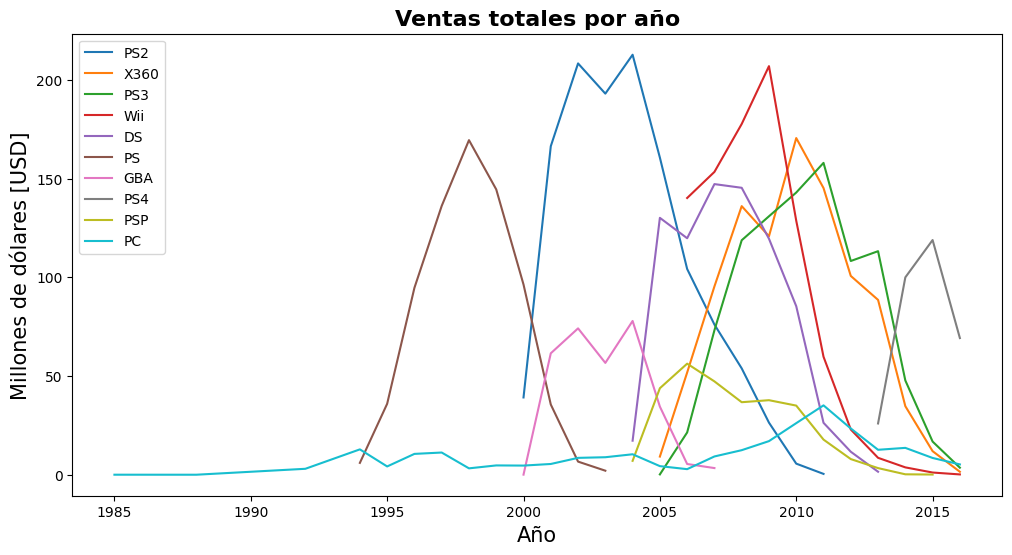

In [16]:
#Arreglamos el valor atípico:
games[(games['platform'] == 'DS')&(games['year_of_release'] == 1985)]
games.loc[15955,'year_of_release'] = 2010
#Filtramos el DF original utilizando la lista de las mejores 10 plataformas:
games_best_platforms = games[games['platform'].isin(top_sales_list)]
#Agrupamos mediante plataforma y año de lanzamiento y sumamos los valores
best_platforms_distribution = games_best_platforms.groupby(['platform','year_of_release']).sum()
#Creación del gráfico de ventas totales por año de cada plataforma:
#Fijamos el tamaño
plt.figure(figsize=(12, 6))
#Hacemos un recorrido por cada consola
for element in top_sales_list:
    #Obtenemos las ventas totales por año
    plt.plot(best_platforms_distribution['total_sales'][element])
    
plt.legend(top_sales_list) #agregamos las leyendas
plt.title('Ventas totales por año', fontsize=16,fontweight=600) #Nombre del gráfico
plt.xlabel('Año', fontsize=15) #Nombre del eje x
plt.ylabel('Millones de dólares [USD]', fontsize=15) #Nombre del eje y
plt.show() #Mostramos

En el gráfico de ventas totales por año notamos la presencia de un valor atípico para la consola 'DS', que marcaba un lanzamiento en 1985, indagando en la información esto correspondía al juego "Strongest Tokyo University Shogi DS", el cual fue lanzado en 2010, por lo que se corrigió ese error. 

Analizando el gráfico, observamos que la mayoría de las consolas presenta un ciclo de vida donde a partir de su lanzamiento empiezan a crecer las ventas hasta alcanzar un pico y posteriormente, comienzan a decaer hasta dejar de tener ventas. El tiempo de lanzamiento a pico es más corto que el tiempo pico a obsolesencia(cuando se dejan de tener ventas), ya que es el tiempo en el cual las compañias aún presentan lanzamientos pero comienzan a darle más empuje a la nueva generación de consolas.

Es importante señalar que la plataforma 'PC' es un caso aparte dado que siempre se mantiene vigente, sin embargo también presenta un auge en ventas entre los años 2010 y 2015. 

Podemos concluir que un periodo adecuado en el cual las plataformas presentan mayores ventas es alrededor de 5 años, con este podemos construir nuestro modelo para 2017. Así, filtraremos la información con los datos del periodo 2012-2016.

In [17]:
#Obtenemos las consolas con las mayores ventas para el periodo de nuestro interés: 2012-2016
top_sales_period = games[games['year_of_release']>2011].groupby('platform')['total_sales'].sum().sort_values(ascending=False)
display(top_sales_period)
#Guardamos la lista de 5 plataformas con mayores ventas del periodo 2012-2016
top_period_list = list(top_sales_period.index)[0:5]

platform
PS4     314.14
PS3     289.71
X360    237.52
3DS     195.01
XOne    159.32
WiiU     82.19
PC       63.51
PSV      49.18
Wii      36.60
DS       13.21
PSP      11.69
Name: total_sales, dtype: float64

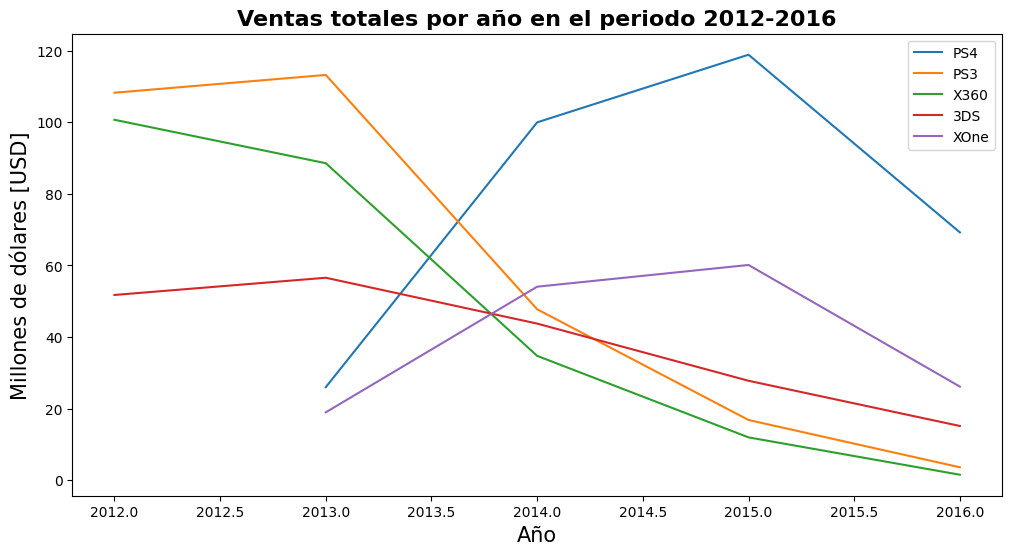

In [18]:
top_period_dist = games[(games['platform'].isin(top_period_list))&(games['year_of_release']>2011)].groupby(['platform','year_of_release']).sum()

#Creación del gráfico de ventas totales por año de cada plataforma:
#Fijamos el tamaño
plt.figure(figsize=(12, 6))
#Hacemos un recorrido por cada consola
for element in top_period_list:
    #Obtenemos las ventas totales por año
    plt.plot(top_period_dist['total_sales'][element])
    
plt.legend(top_period_list) #agregamos las leyendas
plt.title('Ventas totales por año en el periodo 2012-2016', fontsize=16,fontweight=600) #Nombre del gráfico
plt.xlabel('Año', fontsize=15) #Nombre del eje x
plt.ylabel('Millones de dólares [USD]', fontsize=15) #Nombre del eje y
plt.show() #Mostramos

Al filtrar los datos para el periodo 2012-2016 y mostrar el comportamiento de las 5 plataformas con mayores ventas, notamos que consolas como "PS3" y "X360" ya están en el final de su ciclo de vida, la "3DS" apenas está entrando a la recta final del ciclo de vida. Mientras que las consolas de última generación "PS4" y "XOne", apenas llevan 3 años en el mercado, lo que significa que aún entran en nuestro periodo de 5 años donde se tienen mayores ventas totales y apesar de mostrar ya una caida en ventas, todavía presentan buenos números: 69.25 millones de USD para PS4 y 26.15 millones de USD.

De esta forma, las **plataformas potencialmente rentables** que yo considero son la "PS4" y "XOne". 

### Distribución de las ventas totales de los juegos.

En esta sección mostramos el comportamiento de las ventas globales de cada videojuego desglosado por plataforma, utilizando las 10 plataformas con mayores ventas. Para visualizar con mayor detalle los diagramas de caja construidos, eliminamos del gráfico los valores atípicos que aparecen a los costados de los bigotes del diagrama. Asímismo, para complementar el diagrama, crearemos una tabla con la información estadística para cada plataforma. 

Text(0.5, 1.0, 'Distribución de las ventas totales de videojuegos')

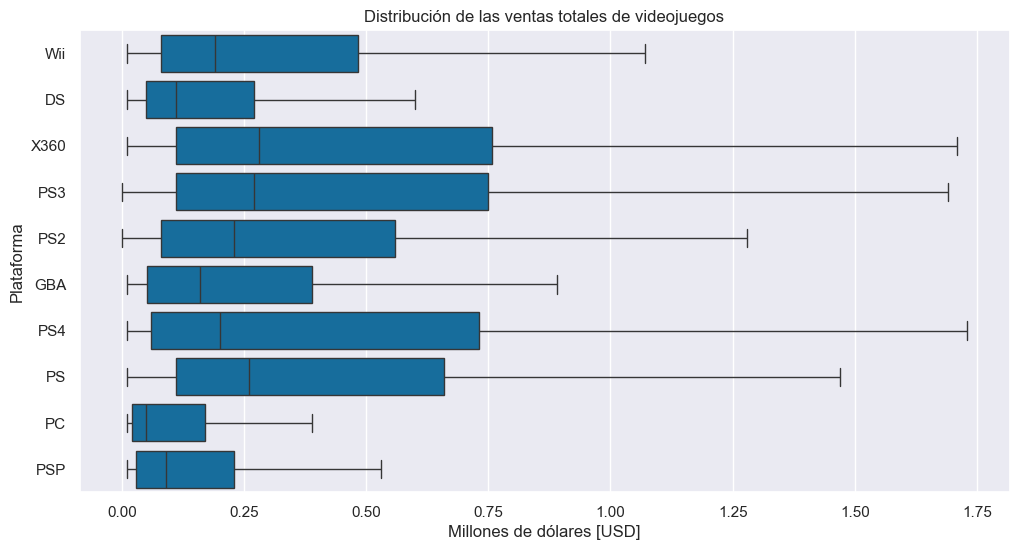

In [19]:
#Creacion de los diagramas de bloque separados por plataforma.
#Modificamos el tamaño
sns.set(rc={"figure.figsize":(12, 6)})
#Cambiamos los colores
sns.set_theme(style="darkgrid", palette="colorblind")
#Creamos el gráfico, donde no mostramos los valores atípicos.
ax = sns.boxplot(data=games_best_platforms, x='total_sales',y='platform',showfliers = False)
#Configuramos titulos
ax.set_xlabel('Millones de dólares [USD]')
ax.set_ylabel('Plataforma')
ax.set_title('Distribución de las ventas totales de videojuegos')


In [20]:
#Creación del dataframe donde se mostrará la información estadística
stat_plat = pd.DataFrame()
#Obtenemos los datos mediante un for
for element in top_sales_list:
    #Utilizamos el método describe() y agregamos en una columna nueva
    stat_plat[element] = games_best_platforms[games_best_platforms['platform']==element]['total_sales'].describe()
#Mostramos el resultado
display(stat_plat)

,PS2,X360,PS3,Wii,DS,PS,GBA,PS4,PSP,PC
count,2161.000000,1262.000000,1331.000000,1320.000000,2151.000000,1197.000000,822.000000,392.000000,1209.000000,974.000000
mean,0.581106,0.769746,0.705973,0.687508,0.374765,0.610576,0.386679,0.801378,0.243218,0.266448
std,1.137927,1.615674,1.391749,3.126609,1.426451,1.054502,0.896897,1.609456,0.520210,0.675577
min,0.000000,0.010000,0.000000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000
25%,0.080000,0.110000,0.110000,0.080000,0.050000,0.110000,0.052500,0.060000,0.030000,0.020000
50%,0.230000,0.280000,0.270000,0.190000,0.110000,0.260000,0.160000,0.200000,0.090000,0.050000
75%,0.560000,0.757500,0.750000,0.482500,0.270000,0.660000,0.390000,0.730000,0.230000,0.170000
max,20.810000,21.820000,21.050000,82.540000,29.800000,10.950000,15.840000,14.630000,7.680000,8.010000


Observamos que en todos los casos tenemos datos sesgados a la derecha, esto porque la distancia entre el tercer cuartil y el segundo es mayor que la distancia entre el primer y segundo cuartil. Podemos reafirmar esta idea notando que en todos los casos el promedio de ventas es mayor que la mediana.

En la mayoría de las plataformas, la media es mayor que o muy cercana al tercer cuartil, esto nos indica que la media no es un valor que determine el comportamiento de toda la población y es mejor utilizar la mediana. Sin embargo, también nos indica que de todos los lanzamientos en cada plataforma, los datos atípicos fueron los que contribuyeron con bastantes ventas tal que la media aumentó considerablemente.

Es importante destacar que las consolas "PS2" y "X360" tienen un comportamiento bastante similar, en general los juegos lanzados en ambas plataformas se venden en cantidades bastante similares. Al menos el 25% de su población(distancia entre el segundo y tercer cuartil) tienen ventas entre 0.25 a 0.75 millones de dólares. 

### Impacto de las reseñas en las ventas

En esta sección se busca encontrar si las reseñas de los usuarios y críticos afectan a las ventas en alguna plataforma popular: la "PS2", ya que es la plataforma con mayores ventas totales al menos en esta muestra. 

In [21]:
ps2_games = games[games['platform']=='PS2']
print(ps2_games)

                                                   name platform  \
17                        Grand Theft Auto: San Andreas      PS2   
24                          Grand Theft Auto: Vice City      PS2   
28                               Gran Turismo 3: A-Spec      PS2   
38                                 Grand Theft Auto III      PS2   
48                                       Gran Turismo 4      PS2   
...                                                 ...      ...   
16668      Sugar + Spice! Anoko no Suteki na Nanimokamo      PS2   
16669                                    Kanokon: Esuii      PS2   
16681                  Scarlett: Nichijou no Kyoukaisen      PS2   
16687                                         Real Rode      PS2   
16707  SCORE International Baja 1000: The Official Game      PS2   

       year_of_release      genre  na_sales  eu_sales  jp_sales  other_sales  \
17              2004.0     Action      9.43      0.40      0.41        10.57   
24              2002.0 

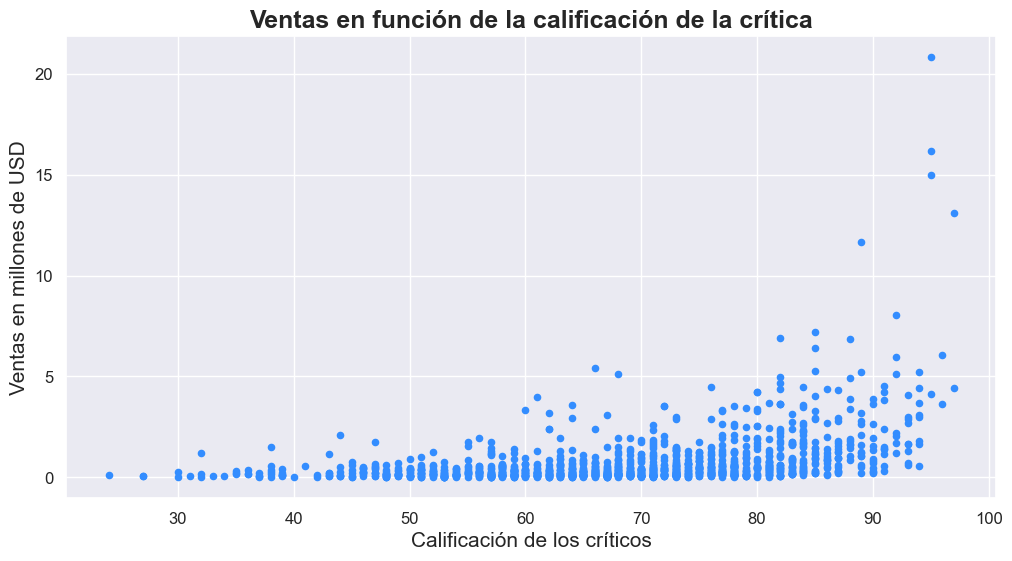

Correlación: 0.39543454945454876


In [22]:
ps2_games.plot(x='critic_score',
               y='total_sales',
               kind = 'scatter',
               grid = True,
               figsize = [12,6],
               fontsize = 12,
               color='#338dff')

plt.title('Ventas en función de la calificación de la crítica', fontsize=18,fontweight=600)
plt.xlabel('Calificación de los críticos', fontsize=15)
plt.ylabel('Ventas en millones de USD', fontsize=15)
plt.show()
print("Correlación:",ps2_games['critic_score'].corr(ps2_games['total_sales']))

Obsevamos que la venta de juegos no depende directamente de la calificación, ya que bastantes datos con buena calificación no presentan ventas tan altas, pero sí se presentan bastantes títulos que tienen buena calificación y excelentes ventas, esto también lo podemos observar con el índice de correlación, el cual es positivo, lo que indica que los valores incrementan mutuamente pero sigue siendo bastaste "pequeño" al ser 0.39(el más alto es 1). Sin embargo, los juegos con una calificación mayor a 80 sí tienden a mostrar mejores ventas.

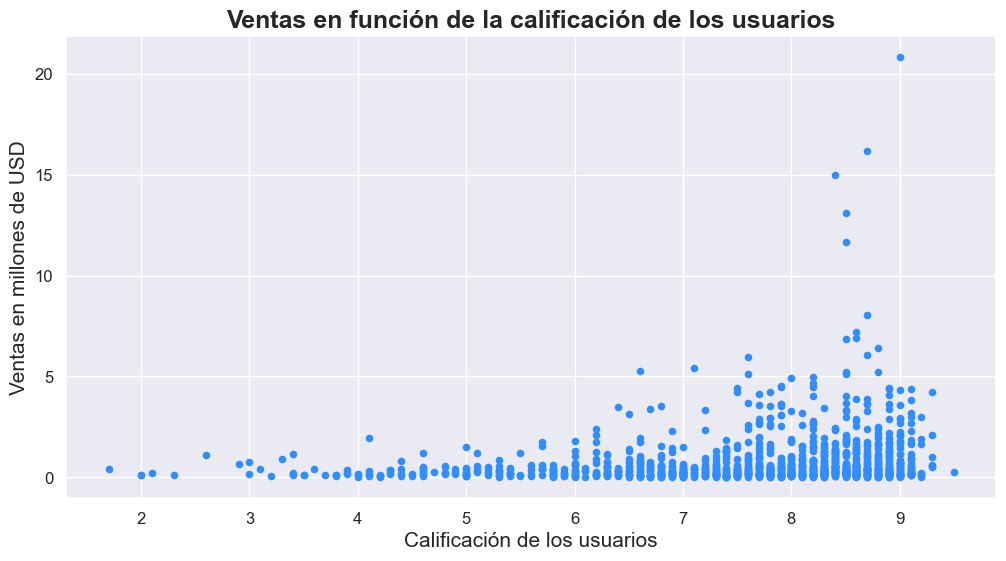

Correlación: 0.17286551112058227


In [23]:
ps2_games.plot(x='user_score',
               y='total_sales',
               kind = 'scatter',
               grid = True,
               figsize = [12,6],
               fontsize = 12,
               color='#338dff')

plt.title('Ventas en función de la calificación de los usuarios', fontsize=18,fontweight=600)
plt.xlabel('Calificación de los usuarios', fontsize=15)
plt.ylabel('Ventas en millones de USD', fontsize=15)
plt.show()

print('Correlación:',ps2_games['user_score'].corr(ps2_games['total_sales']))

Observamos que la ventas totales de los videojuegos no dependen mucho de las calificaciones de los usuarios. Tenemos un índice positivo pero de apenas 0.17, lo cual nos da una relación nada fuerte entre las dos variables de interés. Sin embargo, en el gráfico logramos apreciar que a partir de una calificación de 6, los juegos tienden a tener mejores ventas.

De esta forma notamos que las calificaciones tanto de la crítica como de los usuarios, no influyen directamente en las ventas totales pero sí son un factor a considerar. 

### Comparación de ventas de juegos de PS2 en otras plataformas.

Los juegos multiplataforma son títulos que no son exclusivos de una marca en específico y fueron lanzados en la mayoría de las plataformas disponibles durante la fecha de lanzamiento, un claro ejemplo son algunos títulos de deportes como "FIFA".

En esta sección se hace la comparación entre las ventas en función de la crítica de algunos juegos multiplataforma que estén en la plataforma PS2 y en al menos 1 plataforma más. La información que se toma es para las consolas que comparten al menos 2000 juegos con la PS2.


In [24]:
#Obtenemos la información de los juegos que están presentes en PS2
mult_games = games[games['name'].isin(ps2_games['name'])].reset_index(drop=True)
#Agrupamos por nombre y sumamos el total de plataformas en las que están presentes los juegos, filtramos a partir de 2 plataformas
x = (mult_games.groupby('name')['platform'].count() > 1).sort_index(axis=0)
#Obtenemos la lista de juegos que están presente en PS2 y al menos una plataforma más
list_mult_games = list(x[x==True].index)
#Filtramos y obtenemos la información completa de los juegos presentes en PS2 y en alguna otra plataforma
mult_games = mult_games[(mult_games['name'].isin(list_mult_games))&(~mult_games['critic_score'].isna())&(~mult_games['user_score'].isna())]
#Obtenemos la lista de plataformas
list_platform_mult = list(mult_games['platform'].unique())

#Al ser bastantes plataformas, filtramos para las que compartan al menos 2000 títulos con PS2
list_graph = [] #Lista de plataformas a graficar
for element in list_platform_mult:
    if mult_games[mult_games['platform']==element].size > 2000: #filtro
        list_graph.append(element) #añadimos a la lista
list_graph

['PS2', 'X360', 'XB', 'GC']

Las consolas que comparten al menos 2000 juegos con PS2 son X360, XB y GB, de manera que se harán los gráficos de dispersión y se calculará la correlación entre las ventas por videojuego y su calificación por la crítica.

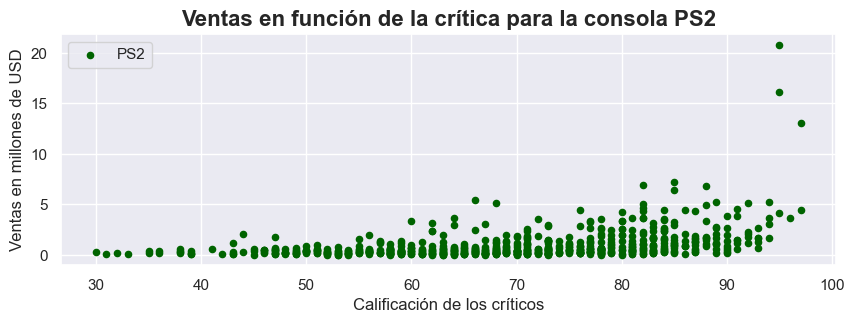

Correlación: 0.3959856838281708


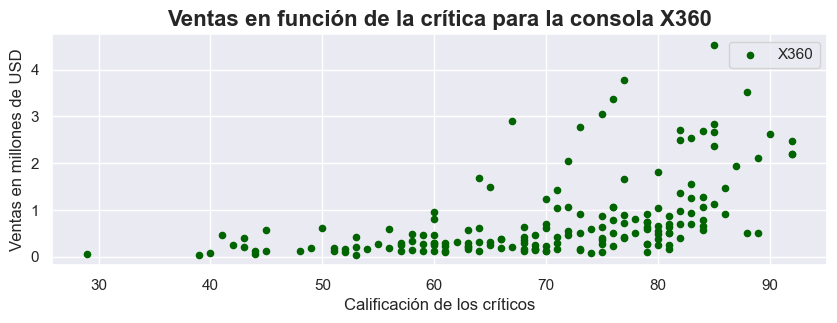

Correlación: 0.506898713028226


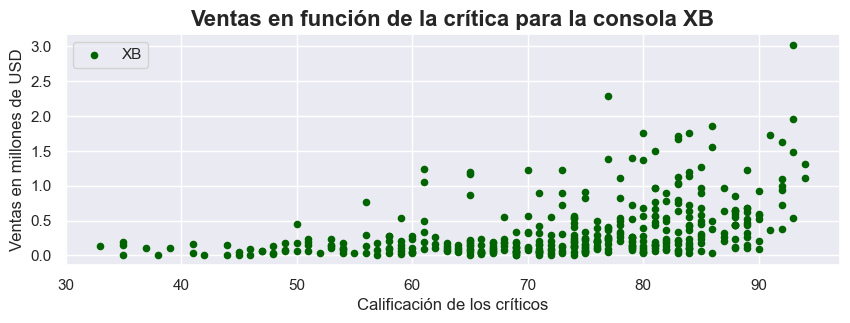

Correlación: 0.42366020313790603


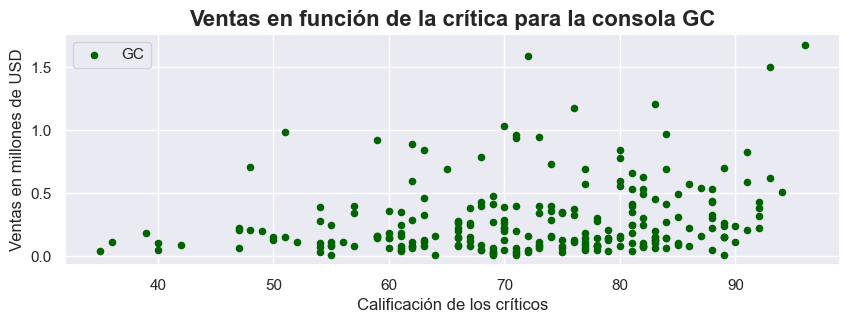

Correlación: 0.21705177514102336


In [25]:
for element in list_graph:
    mult_games[mult_games['platform']==element].plot(kind='scatter', x='critic_score', y='total_sales', color='DarkGreen',
                                                     grid = True, figsize = [10,3],label=element)
    plt.title(f"Ventas en función de la crítica para la consola {element}", fontsize=16,fontweight=600)
    plt.xlabel('Calificación de los críticos', fontsize=12)
    plt.ylabel('Ventas en millones de USD', fontsize=12)
    plt.show()
    print("Correlación:",mult_games[mult_games['platform']==element]['critic_score'].corr(mult_games[mult_games['platform']==element]['total_sales']))

Notamos que la consola GC tiene una correlación similar a la PS2, si bien la clasificación y las ventas aumentan una con la otra dando un índice positivo, el índice es demasiado pequeño como para indicar que las ventas dependen directamente o en gran parte de la calificación que asigne la crítica.


Sin embargo, las consolas XB y X360 tienen índices más altos de correlación, e incluso en los gráficos correspondientes sí se nota una cierta alza de las ventas conforme se tiene una mejor calificación. Esto podría indicar que una parte de los usuarios de 'Xbox' sí toman en cuenta la crítica para comprar o no un título, mientras que parece que los usuarios de PS2 y GC no toman en cuenta tanto este criterio.

### Juegos por género

En esta sección se analiza sobre la rentabilidad de los juegos debido al género al que pertenecen. Como primer acercamiento, obtenemos una tabla que nos indique qué generos son los que mayores y menores ventas totales tienen.

In [26]:
genre_total_sales = games.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
print(genre_total_sales)

genre
Action          1744.17
Sports          1331.27
Shooter         1052.45
Role-Playing     934.56
Platform         827.77
Misc             802.51
Racing           728.67
Fighting         447.53
Simulation       389.97
Puzzle           242.57
Adventure        237.59
Strategy         174.23
Name: total_sales, dtype: float64


De esta forma, haremos el análisis para los 2 mejores y 2 peores géneros respecto a sus ventas, los cuales resultan ser: 'Action' y 'Sports' como los mejores y 'Adventure' y 'Strategy' como los peores.

In [27]:
genres_list = ['Action','Sports','Adventure','Strategy']
print('\t\tInformación por género:\n')
for genre in genres_list:
    aux = games[games['genre'] == genre]
    aux2 = games[games['genre'] == genre].describe()
    print(f"\nPara {genre} contamos con la siguiente información:\n")
    print("\tLista de clásificaciones: ",list(aux['rating'].unique()))
    print("\tJuegos disponibles: ",int(aux2['total_sales']['count']))
    print("\tVentas totales promedio:",round(aux2['total_sales']['mean'],4))

		Información por género:


Para Action contamos con la siguiente información:

	Lista de clásificaciones:  ['M', 'Unavailable', 'E', 'T', 'E10+', 'AO', 'EC']
	Juegos disponibles:  3369
	Ventas totales promedio: 0.5177

Para Sports contamos con la siguiente información:

	Lista de clásificaciones:  ['E', 'Unavailable', 'E10+', 'T', 'M']
	Juegos disponibles:  2348
	Ventas totales promedio: 0.567

Para Adventure contamos con la siguiente información:

	Lista de clásificaciones:  ['Unavailable', 'M', 'E', 'T', 'E10+', 'EC']
	Juegos disponibles:  1303
	Ventas totales promedio: 0.1823

Para Strategy contamos con la siguiente información:

	Lista de clásificaciones:  ['Unavailable', 'T', 'K-A', 'E', 'E10+', 'M', 'RP']
	Juegos disponibles:  683
	Ventas totales promedio: 0.2551


Como se muestra, los géneros con mayores ventas resultan tener mayor disponibilidad de títulos, Action con 3369 y Sports con 2348, mientras que los géneros con menores ventas tienen menos disponibilidad de títulos Adventure con 1303 y Strategy con 683. De igual forma es importante señalar que las ventas promedio por juego son mayores en los géneros Action y Sports, ambos con poco más de 0.5 millones de USD. 

Sin embargo, los géneros con menores ventas no tienen ventas promedio tan pequeñas, para Strategy se tiene la mitad que para Action. Esto podría ser un indicador de que las ventas tienden a estar ligadas a la disponibilidad de titulos.

## Perfiles de Usuario por región

En esta sección se analiza el comportamiento de los usuarios para cada región registrada en los datos, para las 3 regiones se busca la siguiente información:
- Las cinco plataformas principales. Describir las variaciones en sus cuotas de mercado
- Los cinco géneros principales
- Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

Para ello, primero definimos una función que nos permita obtener la información de la región y categoría de interés(plataforma,género o clasificación).
La información se mostrará en una tabla que contenga las siguientes columnas:
- X_sales: Correspondiente a las ventas de la región de interés.
- total_sales: Correspondiente a las ventas totales globalmente de la categoría de interés.
- market_share: Corresponde a la cuota de mercado global, es decir, muestra qué porcentaje de las ventas totales corresponden a las ventas por categoría de la región. Se calcula al dividir las ventas de la región entre las ventas totales y multiplicar por 100.
- region_share: Corresponde a la cuota de mercado regional, es decir, muestra qué porcentaje de las ventas totales de la región corresponden a las ventas por categoría en esa misma región. Se calcula al dividir las ventas de la categoría entre las ventas totales y multiplicar por 100.

In [28]:
#Definimos la función, que tomará por argumentos:
# region toma de valores un string: 'NA', 'UE' o 'JP'
# cat toma de valores un string con la columna de interés: 'platform','genre','rating'

def info_region(region,cat,show=True):
    #Obtenemos la columna de ventas correspondiente a la región
    if region == 'NA':
        ventas = 'na_sales'
    elif region == 'UE':
        ventas = 'eu_sales'
    elif region == 'JP':
        ventas = 'jp_sales'
    else:
        print("Valor no reconocido")
    #Ventas totales de la region
    total_region_sales = games[ventas].sum()
    if cat == 'rating':
        #Ventas por columna de interés en la región, obtenemos las 5 mejores
        best_column_region = games.groupby(cat)[[ventas,'total_sales']].sum().sort_values(by=ventas,ascending=False)
    else:
        #Ventas por columna de interés en la región, obtenemos las 5 mejores
        best_column_region = games.groupby(cat)[[ventas,'total_sales']].sum().sort_values(by=ventas,ascending=False).head(5)
    #Calculamos la cuota de mercado global
    best_column_region['market_share'] = 100*best_column_region[ventas]/best_column_region['total_sales']
    #Calculamos la cuota de mercado regional
    best_column_region['region_share'] = 100*best_column_region[ventas]/total_region_sales
    #Mostramos
    print('\tInformación de la región', region)
    print('Ventas totales de la región:',round(total_region_sales,3))
    if show == True:
        display(best_column_region)
    elif show == False:
        return best_column_region

### Región Norteamérica (NA)

#### Plataformas principales

In [29]:
#Mostramos la información de las plataformas para la región NA
info_region('NA','platform')

	Información de la región NA
Ventas totales de la región: 4400.57


,na_sales,total_sales,market_share,region_share
platform,,,,
X360,602.47,971.42,62.019518,13.690726
PS2,583.84,1255.77,46.492590,13.267372
Wii,496.90,907.51,54.754218,11.291719
PS3,393.49,939.65,41.876231,8.941796
DS,382.40,806.12,47.437106,8.689783


Para la región de norteamérica las mejores 5 plataformas son X360, PS2, Wii, PS3 y DS, en ese orden. Notamos que las ventas entre X360 y PS2 están bastante cercanas una de la otra, si tomamos en cuenta las ventas totales de la región (4400.57 millones de USD) notamos que las ventas de ambas plataformas tienen el mismo porcentaje correspondiente a las ventas totales de la región: 13%.
Lo mismo sucede con las plataformas PS3 y DS, tienen ventas en la región bastante cercanas, resultando en una cuota de mercado del 8% para cada una.

Se resalta que las ventas de la región para las plataformas X360 y Wii tienen cuotas de mercado bastante altas, 62% y 54%, correspondientemente. Esto significa que más de la mitad de las ventas totales para esas consolas se dan en la región de norteamérica.

Las demás plataformas tienen una cuota de mercado considerable ya que ninguna baja del 40% de las ventas globales.

#### Géneros principales

In [30]:
#Obtenemos informacion de los géneros para la región NA
info_region('NA','genre')

	Información de la región NA
Ventas totales de la región: 4400.57


,na_sales,total_sales,market_share,region_share
genre,,,,
Action,879.01,1744.17,50.397037,19.974912
Sports,684.43,1331.27,51.411810,15.553212
Shooter,592.24,1052.45,56.272507,13.458257
Platform,445.50,827.77,53.819298,10.123689
Misc,407.27,802.51,50.749523,9.254937


Los mejores 5 géneros en la región son Action, Sports, Shooter, Platform y Misc, en ese orden. 

Al ser bastantes géneros (12 en total) es normal que las ventas se distribuyan a lo largo de cada uno y las diferencias entre ventas no sean tan abruptas como en otras categorías. Si distribuyeramos equitativamente el porcentaje de ventas entre todos los géneros, se tendría 8.3 por ciento para cada uno. Es por eso que el género "Action" destaca de todos ya que alcanza casi el 20% de las ventas totales de la región, siendo así el más popular en Norteamérica, siguiendole muy de cerca Sports y Shooter. 

Respecto a las ventas globales de cada género señalamos que los 5 mostrados tienen una cuota de mercado de al menos el 50%, es decir, que la mitad de las ventas a nivel global de cada género se dan en esta región. 

#### Clasificación ESRB

In [31]:
#Obtenemos informacion sobre las clasificaciones para la region NA
na_rating = info_region('NA', 'rating',False)
#Obtenemos el número de juegos por clasificacion
na_rating['games_available'] = games.groupby('rating')['name'].count()
display(na_rating)

	Información de la región NA
Ventas totales de la región: 4400.57


,na_sales,total_sales,market_share,region_share,games_available
rating,,,,,
E,1292.99,2435.52,53.088868,29.382330,3990
Unavailable,1240.68,2846.91,43.579881,28.193620,6764
T,759.75,1493.35,50.875548,17.264809,2961
M,748.48,1473.79,50.786069,17.008706,1563
E10+,353.32,655.60,53.892617,8.028960,1420
K-A,2.56,4.32,59.259259,0.058174,3
EC,1.53,1.75,87.428571,0.034768,8
AO,1.26,1.96,64.285714,0.028633,1
RP,0.00,0.09,0.000000,0.000000,3


Respecto a las clasificaciones notamos que sí disminuyen las ventas conforme la clasificación es más restrictiva, otro aspecto relacionado a esto, es la disponibilidad de juegos por clasificación. Por ejemplo, E que es la categoría para todas las edades es la que tiene más ventas en toda la región, pero también la clasificación que más catálogo de juegos tiene. 

Sin embargo, las clasificaciones T y M, tienen ventas muy similares a pesar de que la clasificación M es más restrictiva y tiene menor catálogo que la clasificación T. 

También cabe destacar que la clasifiación "Unavailable" corresponde a todos los valores ausentes en nuestro conjunto de datos y dado que es requisito para los juegos de plataformas el tener una clasificación por la ESRB, no podemos concluir nada sobre estos valores pero se puede suponer que la información mostrada cambie si se obtienen dichos valores ausentes.

Como solo se tiene información importante sobre 4 clasificaciones(E,T,M y E10+) no podemos llegar a conclusiones sobre la influencia de la clasificación de los juegos en sus ventas. 

Por último, es importante señalar que la cuota de mercado para las 4 clasificaciones que resaltan es de al menos el 50%, lo que significa que la mitad de las ventas globales para cada clasificación se dan en esta región.

### Región Unión Europea (EU)

#### Plataformas principales

In [32]:
#Mostramos la información de las plataformas para la región EU
info_region('UE','platform')

	Información de la región UE
Ventas totales de la región: 2424.14


,eu_sales,total_sales,market_share,region_share
platform,,,,
PS2,339.29,1255.77,27.018483,13.996304
PS3,330.29,939.65,35.150322,13.625038
X360,270.76,971.42,27.872599,11.169322
Wii,262.21,907.51,28.893346,10.816620
PS,213.61,730.86,29.227212,8.811785


Para la región de la unión europea las mejores 5 plataformas son PS2, PS3, X360, Wii y PS, en ese orden. Notamos que las consolas PS2 y PS3 tienen ventas bastante cercanas, resultando en una cuota de mercado regional del 13% para cada una.

Respecto a la cuota de mercado global, se observa que en las 5 plataformas las ventas obtenidas en la región corresponden alrededor del 30%, en otras palabras, una tercera parte de las ventas globales se dan en esta región.

Es curioso encontrar que al menos 3 de las 4 consolas Play Station se encuentran dentro de las 5 plataformas con mejores ventas en esta región, esto supone la unión europea es un mercado objetivo para la compañía de Sony.

#### Géneros principales

In [33]:
#Mostramos la información de los géneros para la región EU
info_region('UE','genre')

	Información de la región UE
Ventas totales de la región: 2424.14


,eu_sales,total_sales,market_share,region_share
genre,,,,
Action,519.13,1744.17,29.763727,21.415017
Sports,376.79,1331.27,28.303049,15.543244
Shooter,317.34,1052.45,30.152501,13.090828
Racing,236.51,728.67,32.457766,9.756450
Misc,212.74,802.51,26.509327,8.775896


Los mejores 5 géneros en la región son Action, Sports, Shooter, Racing y Misc, en ese orden.
Como mencionamos anteriormente, si distribuyeramos equitativamente el porcentaje de ventas entre todos los géneros, se tendría 8.3 por ciento para cada uno. Por lo que el género "Action" destaca de todos ya que alcanza el 21% de las ventas totales de la región, siendo así el más popular en la Unión Europea, siguiendole Sports y Shooter.

Respecto a las ventas globales de cada género señalamos que los 5 mostrados tienen una cuota de mercado alrededor del 30%, así que al igual que en las plataformas, una tercera parte de las ventas globales de todos los géneros mostrados se da en esta región.

#### Clasificación ESRB

In [34]:
#Obtenemos información sobre las clasificaciones para la región UE
eu_rating = info_region('UE', 'rating',False)

eu_rating['games_available'] = games.groupby('rating')['name'].count()
display(eu_rating)

	Información de la región UE
Ventas totales de la región: 2424.14


,eu_sales,total_sales,market_share,region_share,games_available
rating,,,,,
E,710.25,2435.52,29.162150,29.299050,3990
Unavailable,613.30,2846.91,21.542655,25.299694,6764
M,483.97,1473.79,32.838464,19.964606,1563
T,427.03,1493.35,28.595440,17.615732,2961
E10+,188.52,655.60,28.755339,7.776779,1420
AO,0.61,1.96,31.122449,0.025164,1
K-A,0.27,4.32,6.250000,0.011138,3
EC,0.11,1.75,6.285714,0.004538,8
RP,0.08,0.09,88.888889,0.003300,3


Sin tomar en cuenta los valores 'Unavailable', notamos que la clasificación E que es la menos restrictiva y con mayor catálogo, es la que mejores ventas tiene en la región. La segunda clasificación con mejores ventas es M(Mature) y le sigue T(Teens), esto nos podría indicar que para esta región la clasificación no supone un riesgo para las ventas. Esto porque la clasificación Mature tiene menor catálogo y es más restrictiva que la clasificación Teens y tiene una cuota de mercado regional 2% más alta. 

Notamos que se repite el patrón de la cuota de mercado global, donde la región supone la tercera parte de las ventas de todo el mundo.

### Región Japonesa (JP)

#### Plataformas principales

In [35]:
#Mostramos la información de las plataformas para la región JP
info_region('JP','platform')

	Información de la región JP
Ventas totales de la región: 1297.34


,jp_sales,total_sales,market_share,region_share
platform,,,,
DS,175.57,806.12,21.779636,13.533075
PS,139.82,730.86,19.130887,10.777437
PS2,139.20,1255.77,11.084832,10.729647
SNES,116.55,200.04,58.263347,8.983767
3DS,100.67,259.00,38.868726,7.759724


Para la región japonesa las mejores 5 plataformas son DS, PS, PS2, SNES y 3DS, en ese orden. Notamos que la consola con mayores ventas es la Nintendo DS que es una consola portátil teniendo el 13% de las ventas totales de la región. Le siguen las consolas PS y PS2, las cuales tienen ventas bastante similares, con un 10.7% de las ventas de la región para cada una, esto nos indica que los usuarios japoneses fueron muy fanáticos de las dos primeras consolas de Sony.  

Respecto a la cuota de mercado global, cada consola tiene un porcentaje distinto de las ventas globales correspondientes a la región. Se destaca que las ventas en la región para la consola SNES corresponden a casi el 60% de las ventas globales, siendo un porcentaje bastante alto. De igual manera, la consola 3DS tiene ventas que corresponden a casi el 40% de las ventas en todo el mundo.

#### Géneros principales

In [36]:
#Mostramos la información de los géneros para la región JP
info_region('JP','genre')

	Información de la región JP
Ventas totales de la región: 1297.34


,jp_sales,total_sales,market_share,region_share
genre,,,,
Role-Playing,355.41,934.56,38.029661,27.395286
Action,161.43,1744.17,9.255405,12.443153
Sports,135.54,1331.27,10.181255,10.447531
Platform,130.83,827.77,15.805115,10.084481
Misc,108.11,802.51,13.471483,8.333205


Los mejores 5 géneros en la región son Role-Playing, Action, Sports, Platform y Misc, en ese orden. El género Role-Playing destaca de todos ya que alcanza el 27% de las ventas totales de la región, siendo el género más popular para los japoneses. Así también, las ventas en esta región corresponden a casi el 40% de las ventas globales. 

El segundo género con mayores ventas es Action, que tiene ventas correspondientes al 12% del total regional, sin embargo, solo corresponden al 9% de las ventas a nivel global. 

El tercer y cuarto puesto (Sports y Platform) tienen ventas bastante similares, obteniendo un 10% de las ventas regionales para cada uno. 

#### Clasificación ESRB

In [37]:
#Obtenemos información sobre las clasificaciones para la región JP
jp_rating = info_region('JP', 'rating',False)

jp_rating['games_available'] = games.groupby('rating')['name'].count()
display(jp_rating)

	Información de la región JP
Ventas totales de la región: 1297.34


,jp_sales,total_sales,market_share,region_share,games_available
rating,,,,,
Unavailable,841.93,2846.91,29.573467,64.896635,6764
E,198.11,2435.52,8.134197,15.270477,3990
T,151.40,1493.35,10.138280,11.670033,2961
M,64.24,1473.79,4.358830,4.951670,1563
E10+,40.20,655.60,6.131788,3.098648,1420
K-A,1.46,4.32,33.796296,0.112538,3
AO,0.00,1.96,0.000000,0.000000,1
EC,0.00,1.75,0.000000,0.000000,8
RP,0.00,0.09,0.000000,0.000000,3


Para esta región, los valores ausentes o 'Unavailable' son los que tiene mayores ventas y la siguiente clasificación con mayores ventas solo supone el 15% de las ventas regionales. Por lo que se recomienda arduamente obtener esta información para mejorar el análisis para el mercado japonés. 

Si analizamos ignorando la fila 'Unavailable', notamos que las ventas de los juegos clasificados es bastante baja. Teniendo las siguientes cuotas de mercado regionales: E - 15.27%, T - 11.67% y M - 4.95%, mostrando que al menos para esta región, la clasificación sí supone riesgo ya que entre más restrictiva sea, menores ventas se tendrán.

### Resumen

Las regiones occidentales: Norteamérica y Europa, siguen patrones bastante marcados. Norteamérica siempre supone el 50% de las ventas globales y la Unión Europea el 30%. De igual forma, tienen patrones de consumo muy similares ya que comparten 4 de 5 plataformas con mayores ventas. En los géneros principales ocurre lo mismo, comparten 4 de 5 géneros: en europa prefieren la categoría Racing y en norteamérica la categoría Platform. 

La región japonesa es la que más diferencias muestra respecto a occidente, por ejemplo, la consola con mayores ventas es una consola portátil y la consola de Microsoft Xbox 360 no figura entre las consolas con mayores ventas mientras que en Europa y Norteamérica sí. Respecto a los géneros, es sorprendente que en Japón el género con más ventas es Role-Playing mientras que este género no aparece en los top 5 de las otras dos regiones estudiadas.

## Análisis estadístico
En esta sección haremos las pruebas correspondientes para dos hipótesis de interés.

### Hipótesis 1: Sobre las calificaciones de los usuarios para las plataformas Xbox One y PC.

#### Formulación de hipótesis:
- Hipótesis nula **H<sub>0</sub>**: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son iguales.
- Hipótesis alternativa **H<sub>1</sub>**: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son distintas.

#### Obtener poblaciones: 
Para poder hacer la prueba debemos tener los datos en dos elementos series separados y sin valores ausentes.

In [38]:
#Filtramos por plataforma y eliminamos valores ausentes
xone_user_score = games[games['platform']=='XOne']['user_score'].dropna()
pc_user_score = games[games['platform']=='PC']['user_score'].dropna()
#Obtenemos varianzas y medias
xone_var = np.var(xone_user_score)
xone_mean = xone_user_score.mean()
pc_var = np.var(pc_user_score)
pc_mean = pc_user_score.mean()
print('Varianza para la poblacion de Xbox One:',xone_var)
print('Varianza para la poblacion de PC:',pc_var)

Varianza para la poblacion de Xbox One: 1.8965188383045526
Varianza para la poblacion de PC: 2.3377471580367684


#### Prueba a utilizar y nivel de significancia:
- Usaremos el nivel de significancia estándar de alpha = 5% (0.05).
- Para comparar dos poblaciones estadísticas diferentes(las calificaciones para Xbox One y PC) podemos utilizar la **prueba t**, que toma las dos muestras de interés, es importante señalar que se deben tomar la varianza de ambas muestras para indicar en el parámetro "Equal variance" si la varianza de ambas debe considerarse o no. En este caso, las varianzas son bastante cercanas por lo que se mantendrá el parámetro equal_var como True.

In [39]:
# Prueba las hipótesis

alpha = 0.05 #Nivel de significancia
#ttest:
result_test_1 = st.ttest_ind(xone_user_score,
                             pc_user_score,
                             equal_var = True)
print('valor p: ', result_test_1.pvalue)

if (result_test_1.pvalue<alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")
print("La calificación promedio de los usuarios de Xbox One es:", round(xone_mean,4))
print("La calificación promedio de los usuarios de PC es:", round(pc_mean,4))

valor p:  1.3896435533548819e-05
Rechazamos la hipótesis nula
La calificación promedio de los usuarios de Xbox One es: 6.5214
La calificación promedio de los usuarios de PC es: 7.0625


Al rechazarse la hipótesis nula, podemos decir que la calificación promedio de los usuarios para las plataformas Xbox One y PC son distintas.

### Hipótesis 2: Sobre las calificaciones promedio de los usuarios para los géneros de Acción y Deportes.

#### Formulación de hipótesis:
- Hipótesis nula **H<sub>0</sub>**: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.
- Hipótesis alternativa **H<sub>1</sub>**: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

#### Obtener poblaciones: 
Para poder hacer la prueba debemos tener los datos en dos elementos series separados y sin valores ausentes.

In [40]:
#Filtramos por plataforma y eliminamos valores ausentes
action_user_score = games[games['genre']=='Action']['user_score'].dropna()
sports_user_score = games[games['genre']=='Sports']['user_score'].dropna()
#Obtenemos varianzas y medias
action_var = np.var(xone_user_score)
action_mean = xone_user_score.mean()
sports_var = np.var(pc_user_score)
sports_mean = pc_user_score.mean()
print('Varianza para la poblacion de Action:',action_var)
print('Varianza para la poblacion de Sports:',sports_var)

Varianza para la poblacion de Action: 1.8965188383045526
Varianza para la poblacion de Sports: 2.3377471580367684


#### Prueba a utilizar y nivel de significancia:
- Usaremos el nivel de significancia estándar de alpha = 5% (0.05).
- Para comparar dos poblaciones estadísticas diferentes(las calificaciones para Accion(Action) y Deportes(Sports)) podemos utilizar la **prueba t**, que toma las dos muestras de interés, es importante señalar que se deben tomar la varianza de ambas muestras para indicar en el parámetro "Equal variance" si la varianza de ambas debe considerarse o no. En este caso, las varianzas son bastante cercanas por lo que se mantendrá el parámetro equal_var como True.

In [41]:
# Prueba las hipótesis

alpha = 0.05 #Nivel de significancia
#ttest:
result_test_1 = st.ttest_ind(action_user_score,
                             sports_user_score,
                             equal_var = True)
print('valor p: ', result_test_1.pvalue)

if (result_test_1.pvalue<alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")
print("La calificación promedio de los usuarios del género Acción es:", round(action_mean,4))
print("La calificación promedio de los usuarios del género Deportes es:", round(sports_mean,4))

valor p:  0.10406951359049141
No podemos rechazar la hipótesis nula
La calificación promedio de los usuarios del género Acción es: 6.5214
La calificación promedio de los usuarios del género Deportes es: 7.0625


La hipótesis que se pide probar originalmente es "Las calificaciones promedio de los usuarios para los géneros Acción y Deportes es distinta", pero la hipótesis nula siempre busca la igualdad, por eso nuestra formulación de la hipótesis nula es: "Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales".

Los resultados de nuestra prueba t nos indican que no podemos rechazar la hipótesis nula, es decir, que no hay motivos para  rechazar que la calificación promedio de los usuarios para los géneros Acción y Deportes sea igual.

En ese sentido podemos decir que la calificación promedio para estos géneros no es distinta.


## Conclusión general

Se realizó un análsis bastante completo sobre los datos históricos de las ventas de videojuegos de la tienda online "Ice" del año 2016, para lo cual se realizó un procedimiento bastante claro.
- **Preparación de los datos:** Se comprende el dataset con el que se está trabajando y las modificaciones a realizar, al hacer la conversión de datos y tratar valores ausentes.
- **Análsis exploratorio:** En esta sección se realizó un análisis que llevó a las siguientes conclusiones:
    - El número de lanzamientos de videojuegos fue creciendo conforme el paso del tiempo debido en gran parte por los avances tecnológicos y la popularidad que fueron ganando.
    - Las plataformas tienen un ciclo de vida de alrededor de 10 años, sin embargo, se considera que las mayores ventas se encuentran en un periodo de cinco años. Las plataformas más rentables para el año 2016 en adelante, son: PS4 y Xbox One.
    - Los ventas totales de los videojuegos por plataforma tienen una distribución tal que unas 3/4 partes del catálogo tienen ventas menores a 1 millon de dólares, pero los datos atípicos son los que más contribuyen a las ventas tanto que modifican bastante la media de ventas por juego, por lo que es recomendado utilizar la mediana. 
    - Las reseñas no son un factor determinante para las ventas de un videojuego, si bien las correlación es positiva, solo en la consolas de Microsoft es donde se muestra un impacto mayor.  
- **Creación de perfiles de usuario:** Se busca entender el consumo de los usuarios en cada región documentada. Se observó que los usuarios de las regiones de Norteamérica y Europa tienen un comportamiento bastante similar, y las ventas en ambas regiones corresponden al 80% de las ventas a nivel global, por lo que es un mercado a tener muy en cuenta. Sin embargo, Japón es un caso a parte y podría considerarse "de nicho" por sus hábitos de consumo y cuota de mercado global bastante pequeña a comparación de las otras dos regiones.
- **Análisis estadístico:** Se busca probar dos hipótesis sobre las calificaciones promedio de los usuarios en donde se encontró que:
    - La calificación promedio de los usuarios para las plataformas Xbox One y PC son distintas.
    - La calificación promedio de los usuarios para los géneros Acción y Deportes no es distinta.

